<h1 style="text-align: center">
Deep Learning HW4 </br>
VAE and CVAE
</h1>




```
`# This is formatted as code`
```

### Full Name: Sana Harighi
### Student ID: 98104047

# Import necessary libraries

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import random
import torchvision


# Define the MNIST dataset and data loader

In [15]:
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Data Visualization

In [16]:
# Function to display an image
def show_image(image, figsize=(5, 5)):
    plt.figure(figsize=figsize)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

# Function to show random images from each class
def show_random_images_from_each_class(dataset, num_images_per_class=4, figsize=(10, 20)):
    class_labels = list(range(10))
    fig, axs = plt.subplots(len(class_labels), num_images_per_class, figsize=figsize)

    for i, label in enumerate(class_labels):
        class_indices = [idx for idx, target in enumerate(dataset.targets) if target == label]
        random_indices = random.sample(class_indices, num_images_per_class)

        for j, idx in enumerate(random_indices):
            image, target = dataset[idx]
            axs[i, j].imshow(image[0], cmap='gray')
            axs[i, j].set_title(f"Class {label}", fontsize=16)
            axs[i, j].axis('off')
            axs[i, j].set_aspect('equal')
            axs[i, j].grid(True)

    plt.tight_layout()
    plt.show()

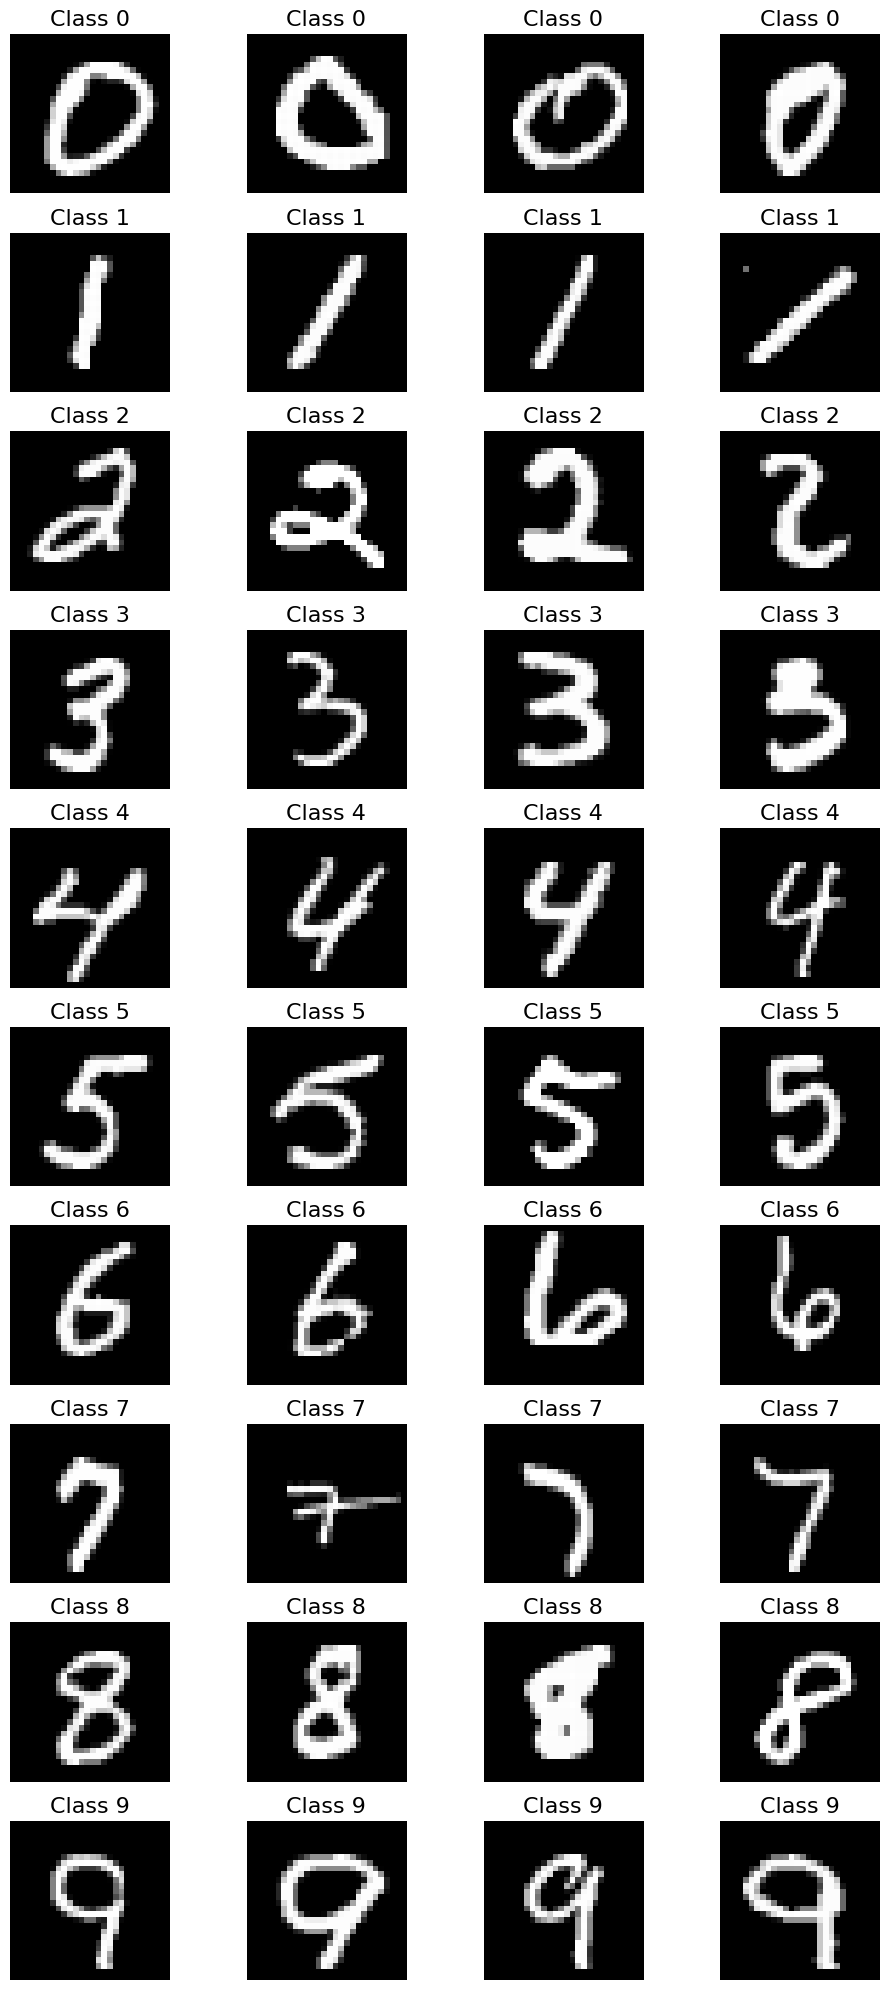

In [17]:
# Use the function to show random images from each class
show_random_images_from_each_class(train_dataset, num_images_per_class=4)

Exercise: Variational Autoencoders (VAE) and Conditional Variational Autoencoders (CVAE)

with MLP Architectures

In this exercise, we'll explore Variational Autoencoders (VAE) and Conditional VAE (CVAE) using PyTorch.

We will implement these models using Multi-Layer Perceptrons (MLP)

Let's get started!

# 1) VAE --> MLP

In [18]:
# Define a simple VAE class with MLP architecture

class VAE_MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VAE_MLP, self).__init__()
        # TODO: Define the architecture of the encoder and decoder
        # Encoder layers
        self.encoder = nn.Sequential(
            # TODO: Add layers for the encoder
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim*2),
        )

        self.fc_mu = nn.Linear(hidden_dim*2, latent_dim)
        self.fc_logvar = nn.Linear(hidden_dim*2, latent_dim)

        # Decoder layers
        self.decoder = nn.Sequential(
            # TODO: Add layers for the decoder
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid()
        )

    def reparameterize(self, mu, logvar):
        # TODO: Implement the reparameterization trick
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        # TODO: Implement the forward pass
        # Encoder
        x = self.encoder(x)
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)

        # Reparameterization trick
        z = self.reparameterize(mu, logvar)

        # Decoder
        x_recon = self.decoder(z)

        return x_recon, mu, logvar


In [19]:
# Define VAE loss function

def vae_loss(recon, data, mu, logvar):
    # TODO: Implement the reconstruction loss
    reconstruction_loss = F.binary_cross_entropy(recon, data, reduction='sum')

    # TODO: Implement the KL divergence loss
    kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    # TODO: Return the total loss as the sum of reconstruction and KL divergence losses
    total_loss = reconstruction_loss + kl_divergence
    return total_loss

In [20]:
# Training Loop - VAE (MLP)
def train_vae_mlp(model, train_loader, num_epochs=10, learning_rate=1e-3):
    model.train()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    best_loss = float('inf')  # Initialize with a high value
    best_model = None

    for epoch in range(num_epochs):
        print()
        print(50 * "#")
        total_loss = 0
        for batch_idx, (data, _) in enumerate(train_loader):
            # TODO: Forward process
            data = data.view(-1, 784)
            recon, mu, logvar = model(data)
            # TODO: Flatten the data and recon tensors
            recon = recon.view(-1, 784)

            # TODO: Calculate the loss using the vae_loss function
            loss = vae_loss(recon, data, mu, logvar)

            # TODO: Backpropagation and optimization step
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader.dataset)
        print(f'VAE-MLP Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss}')

        # Show some sample images after each epoch
        if (epoch + 1) % 1 == 0:
            print("Sample Images:")
            with torch.no_grad():
                num_samples = 6  # Generate num_samples random samples
                sample = torch.randn(num_samples, 2)
                sample = model.decoder(sample).view(num_samples, 1, 28, 28)
                sample = sample.squeeze().cpu()
                fig, axs = plt.subplots(1, num_samples, figsize=(15, 2))
                for i in range(num_samples):
                    axs[i].imshow(sample[i], cmap='gray')
                    axs[i].axis('off')
                plt.show()

        # TODO: Save the best model based on loss
        if avg_loss < best_loss:
            best_loss = avg_loss
            best_model = model.state_dict()  # TODO: Save the model

    # TODO: Save the best model to a file
    torch.save(best_model, 'best_vae_mlp_model.pth')
    print("Best model saved as 'best_vae_mlp_model.pth'")



##################################################
VAE-MLP Epoch [1/10], Loss: 183.84225184733072
Sample Images:


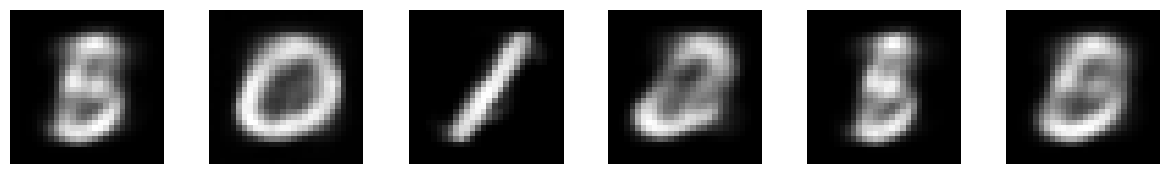


##################################################
VAE-MLP Epoch [2/10], Loss: 166.4127990234375
Sample Images:


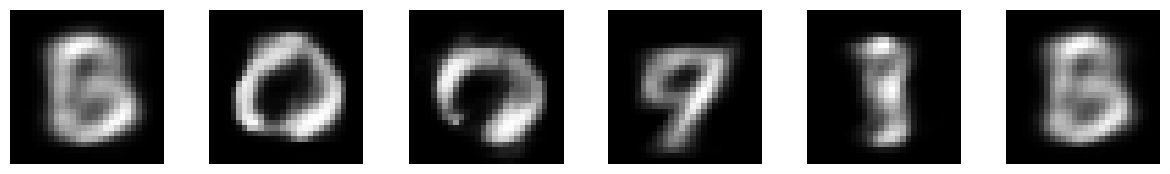


##################################################
VAE-MLP Epoch [3/10], Loss: 163.50503120117187
Sample Images:


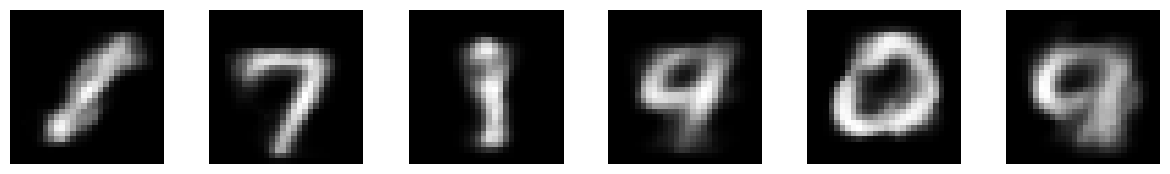


##################################################
VAE-MLP Epoch [4/10], Loss: 161.75852841796876
Sample Images:


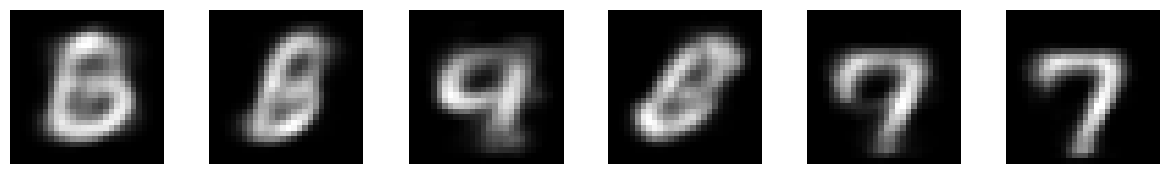


##################################################
VAE-MLP Epoch [5/10], Loss: 160.29818911946614
Sample Images:


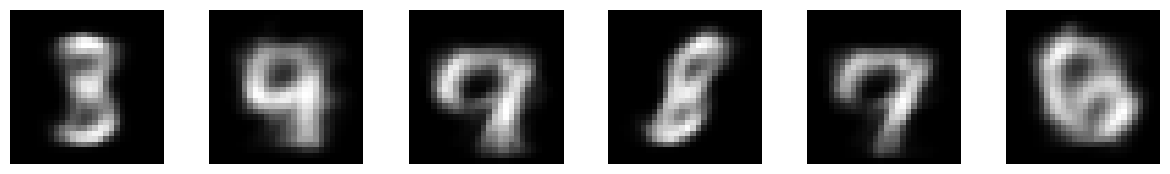


##################################################
VAE-MLP Epoch [6/10], Loss: 158.85845467122397
Sample Images:


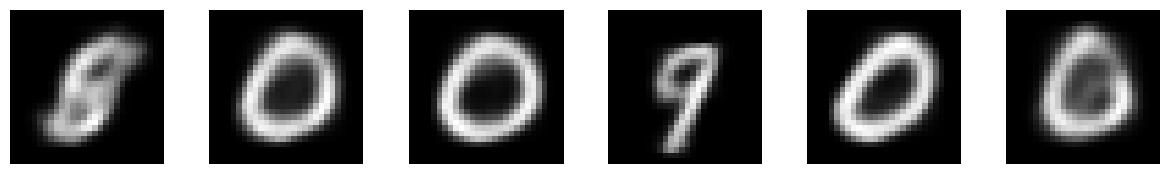


##################################################
VAE-MLP Epoch [7/10], Loss: 157.46424596354166
Sample Images:


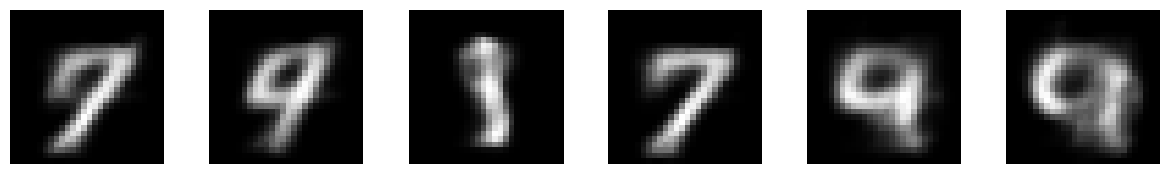


##################################################
VAE-MLP Epoch [8/10], Loss: 156.33669927571614
Sample Images:


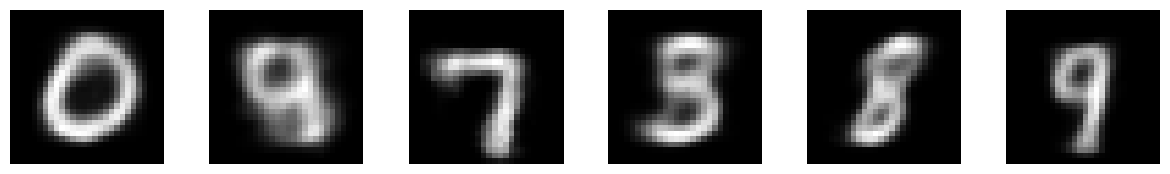


##################################################
VAE-MLP Epoch [9/10], Loss: 155.4321576171875
Sample Images:


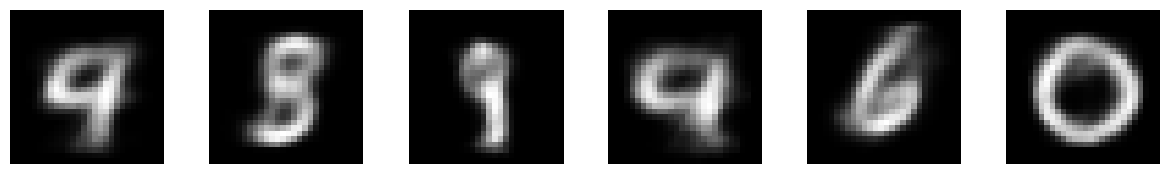


##################################################
VAE-MLP Epoch [10/10], Loss: 154.61052785644532
Sample Images:


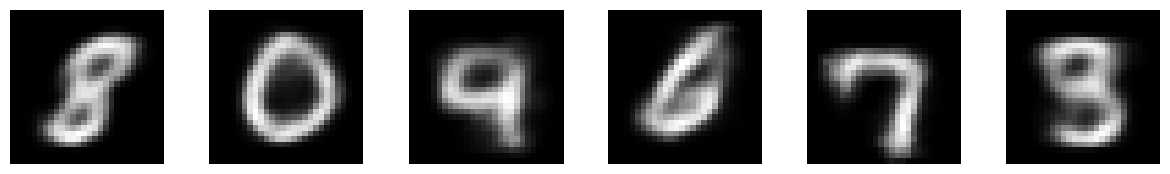

Best model saved as 'best_vae_mlp_model.pth'


In [24]:
# Instantiate VAE-MLP
vae_mlp = VAE_MLP(input_dim=784, hidden_dim=256, latent_dim=2)

train_vae_mlp(vae_mlp, train_loader)


# 2) CVAE --> MLP

In [25]:
# Define a simple CVAE class with MLP architecture

class CVAE_MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim, num_classes):
        super(CVAE_MLP, self).__init__()
        # TODO: Define the architecture of the encoder
        self.encoder = nn.Sequential(
            # TODO: Add layers for the encoder
            nn.Linear(input_dim + num_classes, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim * 2),
        )
        self.fc_mu = nn.Linear(hidden_dim * 2, latent_dim)
        self.fc_logvar = nn.Linear(hidden_dim * 2, latent_dim)
        self.fc_class = nn.Linear(hidden_dim * 2, num_classes)

        # TODO: Define the architecture of the decoder
        self.decoder = nn.Sequential(
            # TODO: Add layers for the decoder
            nn.Linear(latent_dim + num_classes, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid()
        )

    def reparameterize(self, mu, logvar):
        # TODO: Implement the reparameterization trick
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x, y):
        x = x.view(x.size(0), -1)
        y = y.view(y.size(0), -1)

        # Concatenate x and y
        xy = torch.cat([x, y], dim=1)

        # Encoder
        hidden = self.encoder(xy)
        mu = self.fc_mu(hidden)
        logvar = self.fc_logvar(hidden)
        z = self.reparameterize(mu, logvar)
        class_logits = self.fc_class(hidden)

        # Decoder
        decoded_input = torch.cat([z, y], dim=1)
        reconstructed = self.decoder(decoded_input)

        return reconstructed, mu, logvar, class_logits


In [26]:
# Define CVAE loss function
def cvae_loss(recon, data, mu, logvar, class_logits, labels):
    # TODO: Flatten the data tensor
    data = data.view(-1, recon.size(1))

    # TODO: Implement the reconstruction loss
    reconstruction_loss = F.binary_cross_entropy(recon, data, reduction='sum')

    # TODO: Implement the KL divergence loss
    kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    # TODO: Implement the cross-entropy loss for class prediction
    ce_loss = F.cross_entropy(class_logits, labels, reduction='sum')

    # TODO: Return the total loss as the sum of reconstruction, KL divergence, and cross-entropy losses
    total_loss = reconstruction_loss + kl_divergence + ce_loss

    return total_loss


In [27]:
# Training Loop - CVAE (MLP)
def train_cvae_mlp(model, train_loader, num_epochs=10, learning_rate=1e-3):
    model.train()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    best_loss = float('inf')  # Initialize with a high value
    best_model = None

    for epoch in range(num_epochs):
        print()
        print(50 * "#")
        total_loss = 0
        for batch_idx, (data, labels) in enumerate(train_loader):
            optimizer.zero_grad()
            # One-hot encode the labels
            labels_one_hot = F.one_hot(labels, num_classes=10).float()

            # TODO: Forward pass through the model and calculate the loss using cvae_loss
            recon, mu, logvar, class_logits = model(data, labels_one_hot)
            loss = cvae_loss(recon, data, mu, logvar, class_logits, labels)

            # TODO: Backpropagation and optimization step
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader.dataset)
        print(f'CVAE-MLP Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss}')

        # Show some sample images after each epoch
        if (epoch + 1) % 1 == 0:
            print("Sample Images:")
            with torch.no_grad():
                num_classes = 10  # Number of classes (0 to 9)
                num_samples_per_class = 1  # One sample per class
                # Generate random samples
                z = torch.randn(num_classes * num_samples_per_class, 2)
                # Generate one-hot encoded class labels
                y = torch.eye(num_classes).repeat(num_samples_per_class, 1)
                # Concatenate the random samples and class labels before passing them to the decoder
                sample = torch.cat([z, y], dim=1)
                sample = model.decoder(sample).view(num_classes * num_samples_per_class, 1, 28, 28)
                sample = sample.squeeze().cpu()
                fig, axs = plt.subplots(1, num_classes, figsize=(15, 2))
                for i in range(num_classes):
                    axs[i].imshow(sample[i], cmap='gray')
                    axs[i].set_title(f"Class {i}", fontsize=16)
                    axs[i].axis('off')
                plt.show()

        # TODO: Save the best model based on loss
        if avg_loss < best_loss:
            best_loss = avg_loss
            best_model = model.state_dict()

    # TODO: Save the best model to a file
    torch.save(best_model, 'best_cvae_mlp_model.pth')
    print("Best model saved as 'best_cvae_mlp_model.pth'")



##################################################
CVAE-MLP Epoch [1/10], Loss: 167.51092079264322
Sample Images:


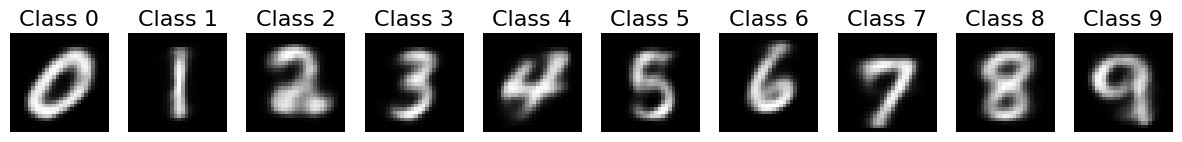


##################################################
CVAE-MLP Epoch [2/10], Loss: 142.26066517740887
Sample Images:


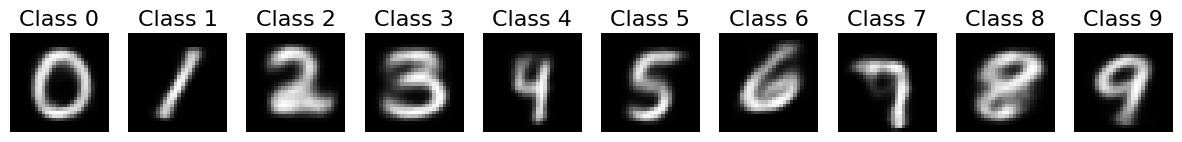


##################################################
CVAE-MLP Epoch [3/10], Loss: 139.19647141113282
Sample Images:


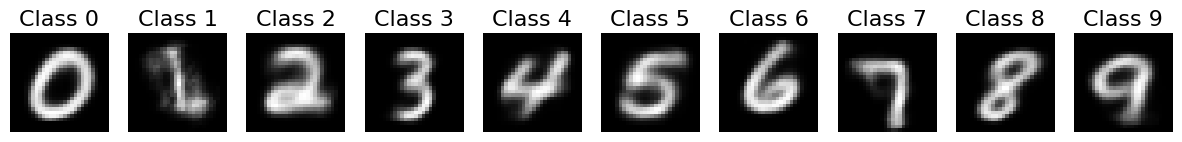


##################################################
CVAE-MLP Epoch [4/10], Loss: 137.68357154947915
Sample Images:


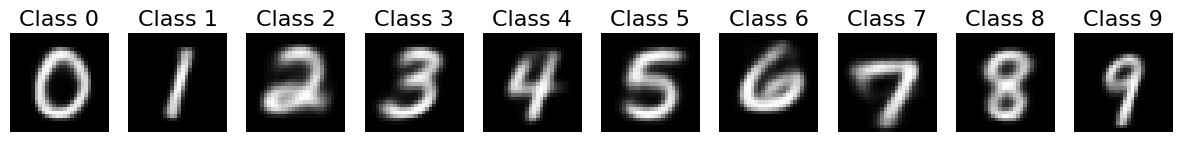


##################################################
CVAE-MLP Epoch [5/10], Loss: 136.56780197753906
Sample Images:


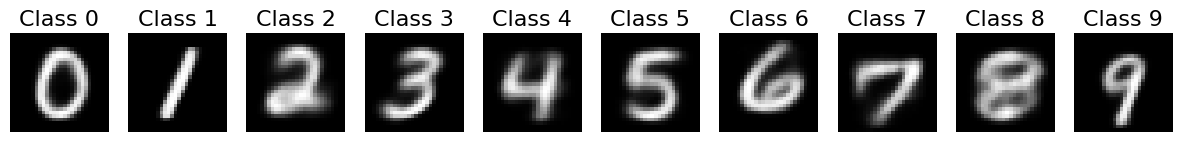


##################################################
CVAE-MLP Epoch [6/10], Loss: 135.6329698893229
Sample Images:


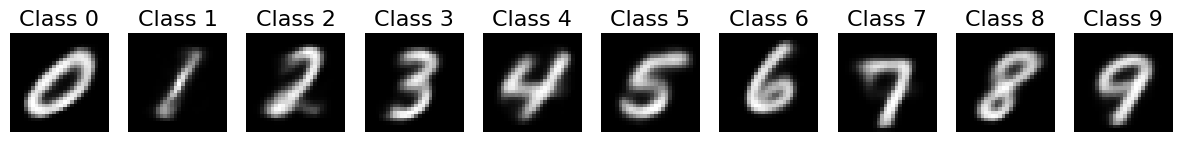


##################################################
CVAE-MLP Epoch [7/10], Loss: 134.8604576090495
Sample Images:


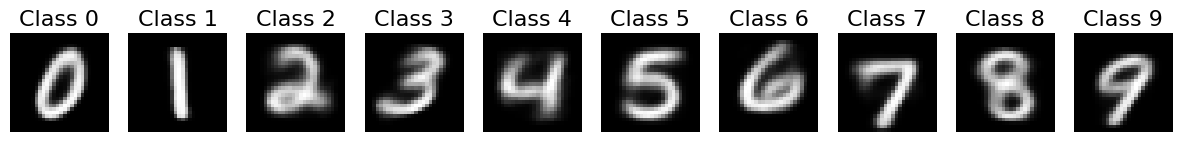


##################################################
CVAE-MLP Epoch [8/10], Loss: 134.27867041422527
Sample Images:


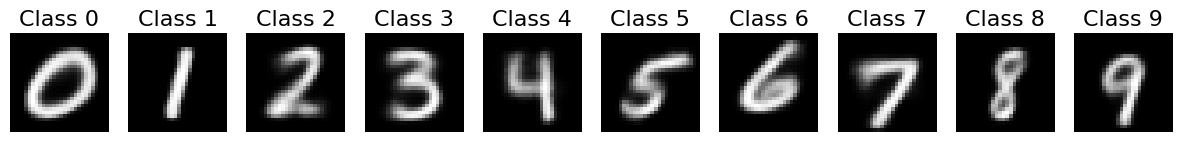


##################################################
CVAE-MLP Epoch [9/10], Loss: 133.8283946085612
Sample Images:


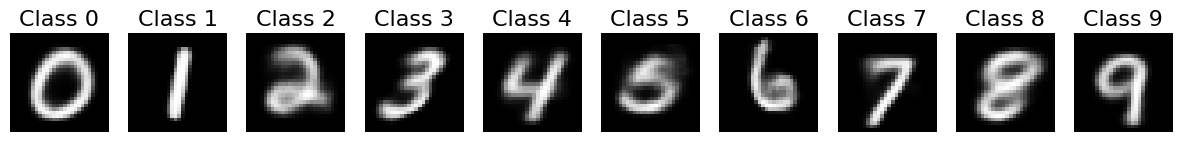


##################################################
CVAE-MLP Epoch [10/10], Loss: 133.4566585164388
Sample Images:


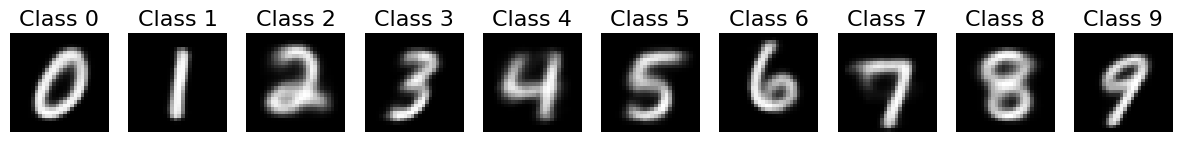

Best model saved as 'best_cvae_mlp_model.pth'


In [28]:
cvae_mlp = CVAE_MLP(input_dim=784, hidden_dim=256, latent_dim=2, num_classes=10)
train_cvae_mlp(cvae_mlp, train_loader)

# 3) Visualizing Latent Space Distribution in Two Models

In this section, we will visualize the latent space distribution for two different models:

## Latent Space Distribution:

### VAE (MLP):

1. Visualize the latent space distribution using Multilayer Perceptron (MLP) in VAE model.
2. Analyze the characteristics of the distribution.

### CVAE (MLP):

1. Visualize the latent space distribution using Multilayer Perceptron (MLP) in CVAE model.
2. Analyze the characteristics of the distribution.


Summarize your findings and draw conclusions based on the observed differences in the latent space distribution between VAE (MLP) and CVAE (MLP).


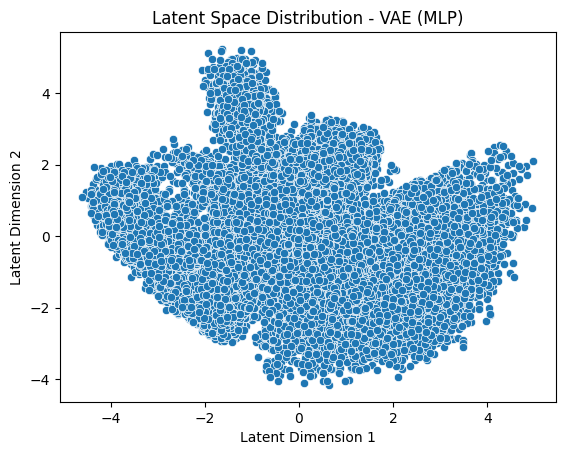

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_vae_latent_space(vae_model, data_loader):
    vae_model.eval()
    latent_space = []

    with torch.no_grad():
        for batch_idx, (data, _) in enumerate(data_loader):
            _, mu, _ = vae_model(data.view(-1, 784))
            latent_space.append(mu.numpy())

    latent_space = np.concatenate(latent_space, axis=0)

    # Visualize latent space distribution
    sns.scatterplot(x=latent_space[:, 0], y=latent_space[:, 1])
    plt.title("Latent Space Distribution - VAE (MLP)")
    plt.xlabel("Latent Dimension 1")
    plt.ylabel("Latent Dimension 2")
    plt.show()

# Visualize latent space distribution for VAE (MLP)
visualize_vae_latent_space(vae_mlp, train_loader)


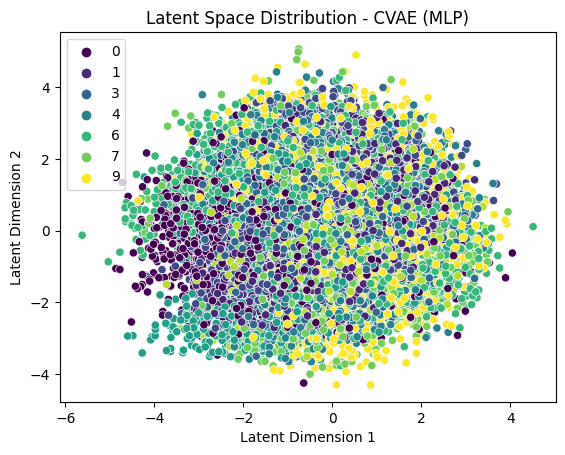

In [38]:
def visualize_cvae_latent_space(cvae_model, data_loader):
    cvae_model.eval()
    latent_space = []
    all_labels = []

    with torch.no_grad():
        for batch_idx, (data, labels) in enumerate(data_loader):
            labels_one_hot = F.one_hot(labels, num_classes=10).float()
            _, mu, _, _= cvae_model(data, labels_one_hot)
            latent_space.append(mu.numpy())
            all_labels.append(labels.numpy())

    latent_space = np.concatenate(latent_space, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)

    # Visualize latent space distribution
    sns.scatterplot(x=latent_space[:, 0], y=latent_space[:, 1], hue=all_labels, palette="viridis")
    plt.title("Latent Space Distribution - CVAE (MLP)")
    plt.xlabel("Latent Dimension 1")
    plt.ylabel("Latent Dimension 2")
    plt.show()

# Visualize latent space distribution for CVAE (MLP)
visualize_cvae_latent_space(cvae_mlp, train_loader)




VAE (MLP):

Latent Space Distribution:

The latent space distribution of VAE (MLP) is learned in an unsupervised manner, meaning the model does not consider class information during training.
The distribution might capture general patterns or features present in the entire dataset without distinguishing between different classes.
Characteristics:

The latent space of VAE (MLP) tends to be more agnostic to class-specific information.
Points in the latent space may represent common features shared across various classes.


CVAE (MLP):

Latent Space Distribution:

The latent space distribution of CVAE (MLP) is conditioned on class information. The model explicitly incorporates class labels during training.
This means that the latent space is expected to be organized in a way that reflects the underlying class structure of the data.
Characteristics:

Points in the latent space of CVAE (MLP) may exhibit clustering or separation based on class information.
The distribution is likely to show regions where samples of the same class are concentrated, indicating a more class-aware representation.

Conclusions:

VAE (MLP):

Suitable for unsupervised learning scenarios where the goal is to capture shared patterns across the entire dataset.
The latent space may not explicitly represent class-related variations.

CVAE (MLP):

Particularly useful when class information is important, as it conditions the latent space on class labels.
The latent space tends to reflect class-specific characteristics, enabling more controlled generation of samples based on desired classes.
The choice between VAE (MLP) and CVAE (MLP) depends on the nature of the task. If class-related information is crucial, CVAE (MLP) provides a more structured and interpretable latent space. Otherwise, VAE (MLP) might be preferred for its ability to capture general patterns without considering class distinctions.